### [참고] <a href="https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf">Pandas Cheat Sheet</a>

In [1]:
# 라이브러리 로드

import pandas as pd
import seaborn as sns

### 멀티인덱스

In [3]:
df = pd.DataFrame({
    'a':[4,5,6],
    'b':[7,8,9],
    'c':[10,11,12],
}, index=pd.MultiIndex.from_tuples([('d',1),('d',2),('e',2)], names=['n','v']))

df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

#### 1) 조회

In [4]:
# iloc[] / loc[]

df.loc['d']

a  b   c
v          
1  4  7  10
2  5  8  11

In [5]:
df.loc['e']

a  b   c
v          
2  6  9  12

In [6]:
df.loc['d',1]

a     4
b     7
c    10
Name: (d, 1), dtype: int64

In [7]:
df.loc['d',2]

a     5
b     8
c    11
Name: (d, 2), dtype: int64

In [9]:
df.loc['e',2]

a     6
b     9
c    12
Name: (e, 2), dtype: int64

## stack() / unstack()

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html

- pivot() 메소드와 밀접하게 연관됨
- multiIndex 객체와 함께 작용하도록 설계됨
- stack() : 컬럼을 마지막 인덱스로
- unstack() : 마지막 인덱스를 컬럼으로

#### stack & unstack
- stack:컬럼 레벨에서 인덱스 레벨로 dataframe 변경
  - 즉, 데이터를 쌓아올리는 개념으로 이해하면 쉬움
- unstack : 인덱스 레벨에서 컬럼 레벨로 dataframe 변경
  - stack 의 반대 operation
- 둘은 역의 관계에 있음   

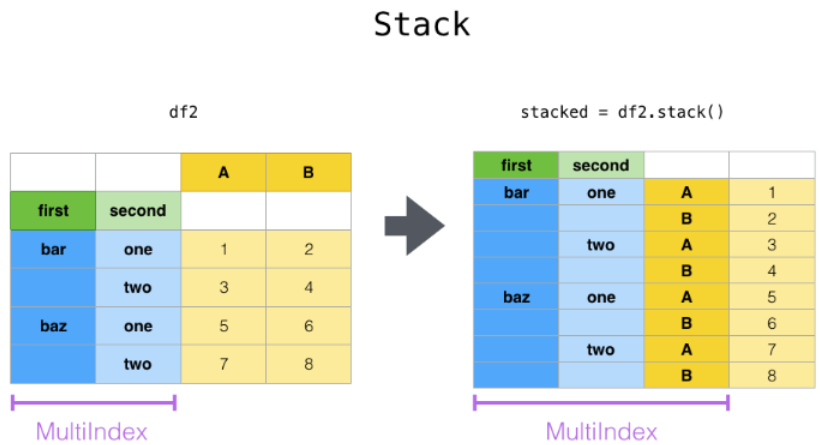

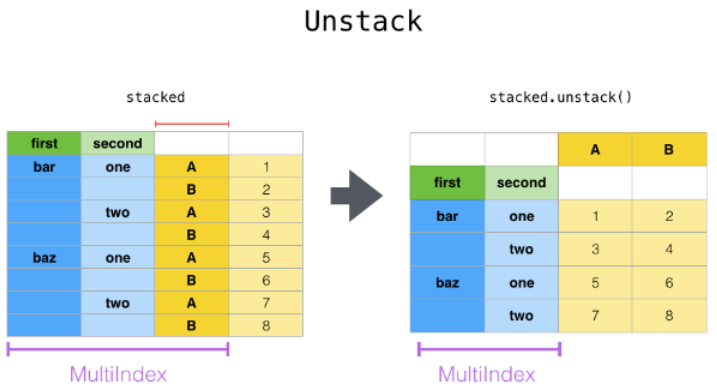

### [실습1]

In [16]:
stack_df = pd.DataFrame({
    'A':[1,3,5,7],
    'B':[2,4,6,8],
}, index=pd.MultiIndex.from_tuples([('bar','one'),('bar','two'),('baz','one'),('baz','two')], names=['n','v']))

df

n    v     
bar  one  A    1
          B    2
     two  A    3
          B    4
baz  one  A    5
          B    6
     two  A    7
          B    8
dtype: int64

#### 1) stack()

In [17]:
stack_df = df.stack()
stack_df

AttributeError: 'Series' object has no attribute 'stack'

- 컬럼이 가장 안쪽에 위치하는 가장 낮은 레벨의 인덱스로 변경

In [ ]:
type(stack_df)

pandas.core.series.Series

- 시리즈 타입으로 결과가 나옴

**stack(숫자) : 숫자가 들어올 수 있는데 멀티 컬럼일때 가능**

stack(level=-1, dropna=True) 레벨 값을 주지 않으면 가장 뒤에 있는 컬럼이 이동하는 것

#### 2) unstack()

In [18]:
stack_df.unstack(0)

A       B    
n   bar baz bar baz
v                  
one   1   5   2   6
two   3   7   4   8

##### unstack(인자) : 어떤 인덱스를 컬럼으로 변경할 것인지 지정 가능

first     bar  baz
second            
one    A    1    5
       B    2    6
two    A    3    7
       B    4    8

second   one  two
first            
bar   A    1    3
      B    2    4
baz   A    5    7
      B    6    8

In [19]:
stack_df.unstack(2)

IndexError: Too many levels: Index has only 2 levels, not 3

### [실습2]

In [23]:
# 데이터프레임 생성

df1 = pd.DataFrame({
    '지역': ['서울','서울','서울','경기','경기','부산','서울','서울','부산','경기','경기','경기'],
    '요일': ['월요일','화요일','수요일','월요일','화요일','월요일','목요일','금요일','화요일','수요일','목요일','금요일'],
    '강수량': [100,80,1000,200,200,100,50,100,200,100,50,100],
    '강수확률': [80,70,90,10,20,30,50,90,20,80,50,10]
})

df1

지역   요일   강수량  강수확률
0   서울  월요일   100    80
1   서울  화요일    80    70
2   서울  수요일  1000    90
3   경기  월요일   200    10
4   경기  화요일   200    20
5   부산  월요일   100    30
6   서울  목요일    50    50
7   서울  금요일   100    90
8   부산  화요일   200    20
9   경기  수요일   100    80
10  경기  목요일    50    50
11  경기  금요일   100    10

In [25]:
new_df = df1.set_index(['지역','요일'])
new_df

강수량  강수확률
지역 요일             
서울 월요일   100    80
   화요일    80    70
   수요일  1000    90
경기 월요일   200    10
   화요일   200    20
부산 월요일   100    30
서울 목요일    50    50
   금요일   100    90
부산 화요일   200    20
경기 수요일   100    80
   목요일    50    50
   금요일   100    10

In [26]:
new_df

강수량  강수확률
지역 요일             
서울 월요일   100    80
   화요일    80    70
   수요일  1000    90
경기 월요일   200    10
   화요일   200    20
부산 월요일   100    30
서울 목요일    50    50
   금요일   100    90
부산 화요일   200    20
경기 수요일   100    80
   목요일    50    50
   금요일   100    10

In [27]:
# index => column : unstack()
new_df.unstack(0)

강수량                 강수확률            
지역      경기     부산      서울    경기    부산    서울
요일                                         
금요일  100.0    NaN   100.0  10.0   NaN  90.0
목요일   50.0    NaN    50.0  50.0   NaN  50.0
수요일  100.0    NaN  1000.0  80.0   NaN  90.0
월요일  200.0  100.0   100.0  10.0  30.0  80.0
화요일  200.0  200.0    80.0  20.0  20.0  70.0

In [28]:
new_df.unstack(1)

강수량                              강수확률                        
요일    금요일   목요일     수요일    월요일    화요일   금요일   목요일   수요일   월요일   화요일
지역                                                                 
경기  100.0  50.0   100.0  200.0  200.0  10.0  50.0  80.0  10.0  20.0
부산    NaN   NaN     NaN  100.0  200.0   NaN   NaN   NaN  30.0  20.0
서울  100.0  50.0  1000.0  100.0   80.0  90.0  50.0  90.0  80.0  70.0

In [29]:
new_df.unstack(0).stack(0)

C:\Users\soldesk\AppData\Local\Temp\ipykernel_12936\3150064354.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  new_df.unstack(0).stack(0)


지역           경기     부산      서울
요일                            
금요일 강수량   100.0    NaN   100.0
    강수확률   10.0    NaN    90.0
목요일 강수량    50.0    NaN    50.0
    강수확률   50.0    NaN    50.0
수요일 강수량   100.0    NaN  1000.0
    강수확률   80.0    NaN    90.0
월요일 강수량   200.0  100.0   100.0
    강수확률   10.0   30.0    80.0
화요일 강수량   200.0  200.0    80.0
    강수확률   20.0   20.0    70.0

In [30]:
new_df.unstack(0).stack(1)

C:\Users\soldesk\AppData\Local\Temp\ipykernel_12936\1778177021.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  new_df.unstack(0).stack(1)


강수량  강수확률
요일  지역              
금요일 경기   100.0  10.0
    서울   100.0  90.0
목요일 경기    50.0  50.0
    서울    50.0  50.0
수요일 경기   100.0  80.0
    서울  1000.0  90.0
월요일 경기   200.0  10.0
    부산   100.0  30.0
    서울   100.0  80.0
화요일 경기   200.0  20.0
    부산   200.0  20.0
    서울    80.0  70.0

강수량  강수확률
요일  지역              
금요일 경기   100.0  10.0
    서울   100.0  90.0
목요일 경기    50.0  50.0
    서울    50.0  50.0
수요일 경기   100.0  80.0
    서울  1000.0  90.0
월요일 경기   200.0  10.0
    부산   100.0  30.0
    서울   100.0  80.0
화요일 경기   200.0  20.0
    부산   200.0  20.0
    서울    80.0  70.0

### [참고] melt 와 stack

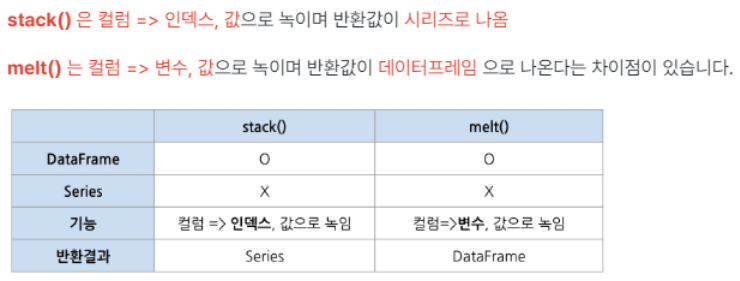